In [1]:
import sys, os
import os
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import math
# !pip install advent-of-code-data
# https://github.com/wimglenn/advent-of-code-data #for input parsing/loading
from aocd import get_data  # simple, #get_data(day=24, year=2021)
from aocd.models import Puzzle

In [2]:
%matplotlib inline

In [3]:
%load_ext pycodestyle_magic
%pycodestyle_on 
%pycodestyle_off

In [63]:
#  run ONCE
import datetime
today = datetime.datetime.now().day
puzzle = Puzzle(year=2022, day=today)
#print(puzzle.user)
print(puzzle.input_data_fname[60:])
print(puzzle.example_input_data_fname[60:])


iA = puzzle.input_data
iE = puzzle.example_data
print(iE)
try:
    print(puzzle.easter_egg)
except:
    pass

2022_14_input.txt
2022_14_example_input.txt
498,4 -> 498,6 -> 496,6
503,4 -> 502,4 -> 502,9 -> 494,9


In [235]:
# test and solve part A
# iA,iE,

class puzzlegrid:
    def __init__(self):
        self.input = None
        self.L = 1000
        self. W =1000
        self.grid =-np.ones([self.L,self.W])
        self.grid[1:-1,1:-1]=0
        self.grid[500,0] = -9 # source
        self.max_Y = 0
        #self.grid[:,self.max_Y +1] = 3 # source
        pass
    def build_walls(self,i=None,with_floor=False):
        if i is not None:
            self.input = i
            lines = i.split('\n')
            

        
        for line in lines:
            #print(line)
            wallvert = line.split(' -> ')
            #print(wallvert)
            px = None
            py = None
            for coord in wallvert:
                #print()
                #print('coord',coord)
                vx,vy=coord.split(',')
                #print(vx)
                #print(vy)
                vx= int(vx)
                vy = int(vy)
                self.max_Y= max(self.max_Y,vy)
                
                #print(vx,vy)
                if px == None:
                    px = vx
                    py = vy
                else:
                    #print('wall from ', px,py, ' to: ', vx,vy)
                    if px == vx: #follow y dir)
                        ywall = np.arange(min(py,vy),max(py,vy)+1)
                        xwall =0*ywall + px
                        #print('v_wall along: ', ywall)
                    else: #follow x dir)
                        xwall =np.arange(min(px,vx),max(px,vx)+1)
                        #print('h_wall along: ', xwall)
                        ywall =0*xwall+  py
                    for n in range(len(ywall)):
                        self.grid[xwall[n],ywall[n]] = '8' # 8 == wall
                px = vx
                py = vy
        print('floor being added:',with_floor)
        if with_floor:
            print('floor at level ',self.max_Y+2 )
            for i in range(1000):
                self.grid[i,int(self.max_Y+2)] = '8'  # = floor at level 3
        
        return self.grid

    
    def simulate(self,n_grains = 0):
        xs = 500
        ys = 0
        flowing=True
        path_ = [(xs,ys)] #start at startpos.

        for grain in range(n_grains):
            #xc = path_[-1][0]
            #yc = path_[-1][1]         
            xc = xs
            yc = ys
            #print('grain started at ',xc,yc)
            
            falling =True
            #print( ' values: ',val_pos1,val_pos2,val_pos3)
            while falling:
                
                # check next poss position
                val_pos1 = self.grid[xc, yc+1]
                val_pos2 = self.grid[xc-1, yc+1]
                val_pos3 = self.grid[xc+1, yc+1]
                if (val_pos1 == 0):
                    xc += 0
                    yc += +1       
                    path_.append((xc,yc))
                    
                elif (val_pos2 == 0):
                    xc += -1
                    yc += +1
                    path_.append((xc,yc))
                elif (val_pos3 == 0):
                    xc += +1
                    yc += +1
                    path_.append((xc,yc))
                elif (val_pos1== -9): #start
                    falling =False
                    print('flow_stopped')
                    return grain, self.grid,path_
                else:
                    falling =False
                    
                    if (val_pos1 ==-1) or (val_pos1 ==-1) or (val_pos3 ==-1):  #reached edge
                        #print('grain', grain,'reached edge at ', xc,yc)
                        
                        return grain, self.grid,path_
                    else:
                        #print('grain', grain,'landed at ', xc,yc)
                        path_.pop() # to make sure the next one falls from a bit higher
                        self.grid[xc,yc]= 1 # write 1 where grain is.
                if path_[-1]==(500,0):
                    
                    print('flow plugged')
                    return grain, self.grid,path_
                    
        pass
        return grain, self.grid,path_
    def fun(self, params=None):
        print('hello')
        pass


def fun2(i=None):
    print('world')
    pass


floor being added: False
[[-1. -1. -1. ... -1. -1. -1.]
 [-1.  0.  0. ...  0.  0. -1.]
 [-1.  0.  0. ...  0.  0. -1.]
 ...
 [-1.  0.  0. ...  0.  0. -1.]
 [-1.  0.  0. ...  0.  0. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]
max_Y =  9
ngrains: 24
answA:  24


TypeError: imsave() missing 1 required positional argument: 'arr'

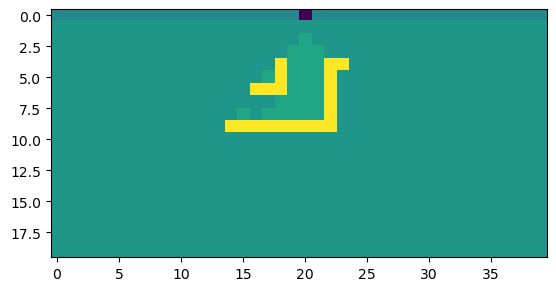

In [248]:
## A ; no wall
field = puzzlegrid()


##A
grid=field.build_walls(i=iE)
print(grid)
print('max_Y = ',field.max_Y)
ngrains_before_overflow, filled_grid,path_= field.simulate(99999)
print('ngrains:',ngrains_before_overflow)
#IA= #
#plt.imshow(filled_grid[400:600,0:400].transpose()) #walls
#IE
plt.imshow(filled_grid[480:520,0:20].transpose()) #walls
answA = int(ngrains_before_overflow)
print('answA: ',answA)
plt.imsave('readable.png')

In [180]:
puzzle.answer_a = answA # this submits!

That's the right answer!  You are one gold star closer to collecting enough star fruit. [Continue to Part Two]


floor being added: True
floor at level  165
[[-1. -1. -1. ... -1. -1. -1.]
 [-1.  0.  0. ...  0.  0. -1.]
 [-1.  0.  0. ...  0.  0. -1.]
 ...
 [-1.  0.  0. ...  0.  0. -1.]
 [-1.  0.  0. ...  0.  0. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]
maxY =  163
ngrains: 99998
answB:  25248


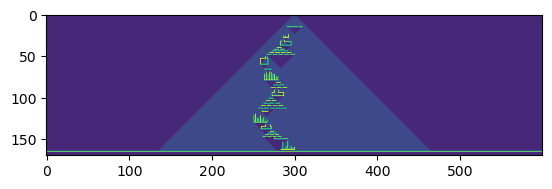

In [246]:
## B with floor
field = puzzlegrid()
grid=field.build_walls(i=iA,with_floor=True)

print(grid)
plt.imshow(grid[480:520,0:20].transpose()) #walls
print('maxY = ',field.max_Y) 
ngrains_before_overflow, filled_grid,path_= field.simulate(99999)
print('ngrains:',ngrains_before_overflow)
#IA= #
plt.imshow(filled_grid[200:800,0:170].transpose()) #walls
plt.savefig('sandpile.png')
#IE
#plt.imshow(filled_grid[480:520,0:20].transpose()) #walls
answA = int(ngrains_before_overflow)
answB = np.sum(np.sum(filled_grid==1))
print('answB: ',answB)

In [ ]:
# test and solve part B, use inputs & test inputs.

In [243]:
print(answB)

25248


In [244]:
puzzle.answer_b = answB # this submits!

That's the right answer!  You are one gold star closer to collecting enough star fruit.You have completed Day 14! You can [Shareon
  Twitter
Mastodon] this victory or [Return to Your Advent Calendar].
